In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test , y_test) = fashion_mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images into 784-dimensional vectors
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Define Model 1 with constant learning rate
model1 = models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile Model 1 with a simple SGD optimizer using a fixed learning rate
initial_lr = 0.01  # Set the learning rate you want to use initially
model1.compile(optimizer=optimizers.SGD(learning_rate=initial_lr),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train Model 1 for 40 epochs
history1 = model1.fit(x_train_flat, y_train, epochs=40, validation_data=(x_test_flat, y_test))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6788 - loss: 1.0152 - val_accuracy: 0.8055 - val_loss: 0.5764
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8175 - loss: 0.5363 - val_accuracy: 0.8214 - val_loss: 0.5150
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8332 - loss: 0.4823 - val_accuracy: 0.8307 - val_loss: 0.4826
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8430 - loss: 0.4525 - val_accuracy: 0.8386 - val_loss: 0.4658
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8491 - loss: 0.4315 - val_accuracy: 0.8250 - val_loss: 0.4785
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8551 - loss: 0.4211 - val_accuracy: 0.8436 - val_loss: 0.4452
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8599 - loss: 0.4031 - val_accuracy: 0.8458 - val_loss: 0.4421
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8616 - loss: 0.4003 - 

In [6]:
# Define Model 2 with constant learning rate
model2 = models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(48, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile Model 2 with SGD and fixed learning rate
model2.compile(optimizer=optimizers.SGD(learning_rate=initial_lr),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train Model 2 for 40 epochs
history2 = model2.fit(x_train_flat, y_train, epochs=40, validation_data=(x_test_flat, y_test))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6079 - loss: 1.1799 - val_accuracy: 0.7886 - val_loss: 0.6271
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7845 - loss: 0.6490 - val_accuracy: 0.8130 - val_loss: 0.5520
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8109 - loss: 0.5669 - val_accuracy: 0.8285 - val_loss: 0.5114
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8232 - loss: 0.5292 - val_accuracy: 0.8277 - val_loss: 0.4943
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8310 - loss: 0.5000 - val_accuracy: 0.8354 - val_loss: 0.4736
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8367 - loss: 0.4848 - val_accuracy: 0.8419 - val_loss: 0.4600
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8407 - loss: 0.4709 - val_accuracy: 0.8430 - val_loss: 0.4514
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8431 - loss: 0.4579 - 

In [7]:
def weight_distribution_plot(model1, model2):
  # Get weights from Model 1
  weights_model1_input = model1.layers[0].get_weights()[0].flatten()  # Input layer weights
  weights_model1_hidden = model1.layers[1].get_weights()[0].flatten()  # Hidden layer weights
  # Get weights from Model 2
  weights_model2_input = model2.layers[0].get_weights()[0].flatten()  # Input layer weights
  weights_model2_hidden = model2.layers[2].get_weights()[0].flatten()  # Hidden layer weights
  plt.figure(figsize=(12, 8))
  # Model 1 Input Layer Weights
  plt.subplot(2, 2, 1)
  plt.hist(weights_model1_input, bins=30, color='blue', alpha=0.7)
  plt.title('Model 1 - Input Layer Weights')
  # Model 1 Hidden Layer Weights
  plt.subplot(2, 2, 2)
  plt.hist(weights_model1_hidden, bins=30, color='blue', alpha=0.7)
  plt.title('Model 1 - Hidden Layer Weights')
  # Model 2 Input Layer Weights
  plt.subplot(2, 2, 3)
  plt.hist(weights_model2_input, bins=30, color='green', alpha=0.7)
  plt.title('Model 2 - Input Layer Weights')
  # Model 2 Hidden Layer Weights
  plt.subplot(2, 2, 4)
  plt.hist(weights_model2_hidden, bins=30, color='green', alpha=0.7)
  plt.title('Model 2 - Hidden Layer Weights')
  plt.tight_layout()
  plt.show()


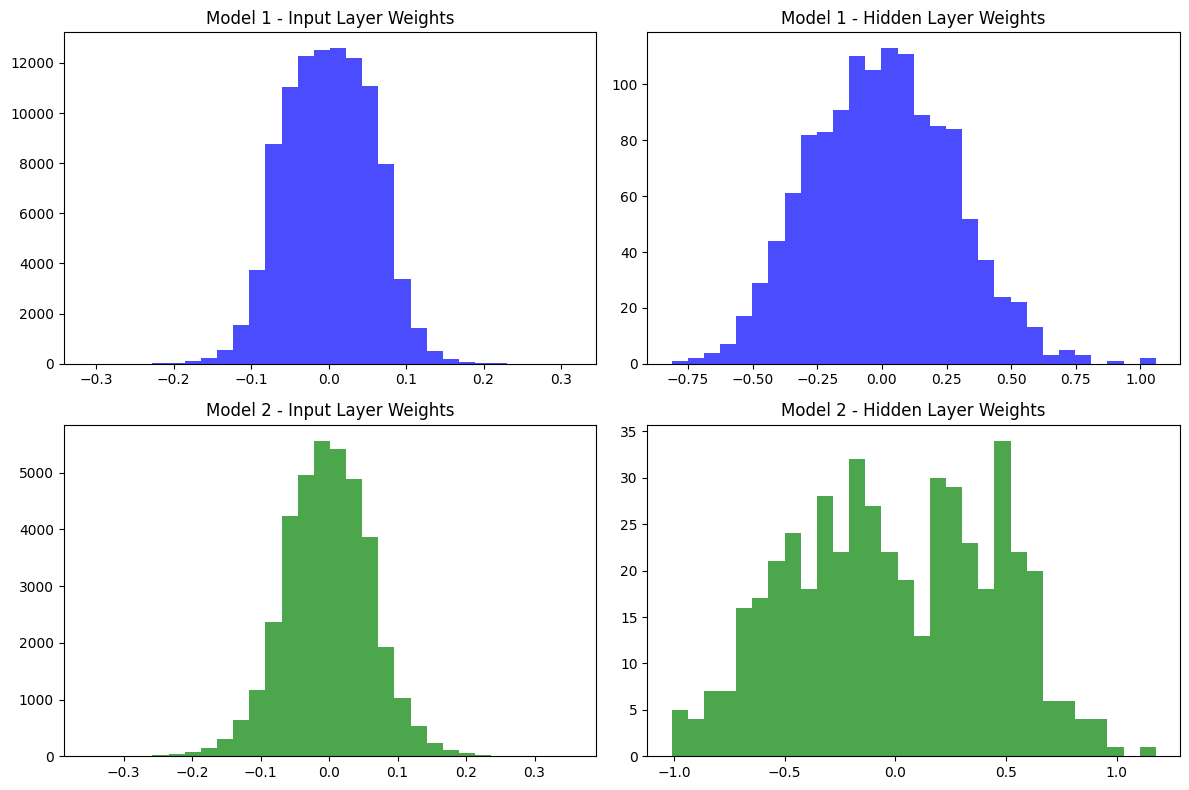

In [8]:
weight_distribution_plot(model1, model2)

In [ ]:
# Model 1 with SGD
final_train_accuracy_model1_sgd = history1.history['accuracy'][-1]
final_val_accuracy_model1_sgd = history1.history['val_accuracy'][-1]
print(f"Model 1 (SGD) Train Accuracy: {final_train_accuracy_model1_sgd:.4f}, Validation Accuracy: {final_val_accuracy_model1_sgd:.4f}")

# Model 2 with SGD
final_train_accuracy_model2_sgd = history2.history['accuracy'][-1]
final_val_accuracy_model2_sgd = history2.history['val_accuracy'][-1]
print(f"Model 2 (SGD) Train Accuracy: {final_train_accuracy_model2_sgd:.4f}, Validation Accuracy: {final_val_accuracy_model2_sgd:.4f}")

In [9]:
# Define Model 1
model1_adam = models.Sequential()
model1_adam.add(layers.Input(shape=(28*28,)))

model1_adam.add(layers.Dense(128, activation='relu'))
model1_adam.add(layers.Dense(10, activation='softmax'))

# Compile Model 1
model1_adam.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train Model 1 for 40 epochs
history1 = model1_adam.fit(x_train_flat, y_train, epochs=40, validation_data=(x_test_flat, y_test))


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7864 - loss: 0.6247 - val_accuracy: 0.8510 - val_loss: 0.4150
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8620 - loss: 0.3804 - val_accuracy: 0.8662 - val_loss: 0.3770
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8761 - loss: 0.3370 - val_accuracy: 0.8680 - val_loss: 0.3681
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8819 - loss: 0.3169 - val_accuracy: 0.8727 - val_loss: 0.3528
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8925 - loss: 0.2921 - val_accuracy: 0.8776 - val_loss: 0.3420
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8998 - loss: 0.2720 - val_accuracy: 0.8694 - val_loss: 0.3635
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8992 - loss: 0.2668 - val_accuracy: 0.8761 - val_loss: 0.3576
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9031 - loss: 0.2539

In [10]:
# Define Model 2
model2_adam = models.Sequential()
model2_adam.add(layers.Input(shape=(28*28,)))

model2_adam.add(layers.Dense(48, activation='relu',
                        kernel_regularizer=regularizers.l2(0.0001)))
model2_adam.add(layers.Dropout(0.2))
model2_adam.add(layers.Dense(10, activation='softmax'))

# Compile Model 2
model2_adam.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train Model 2 for 40 epochs
history2 = model2_adam.fit(x_train_flat, y_train, epochs=40, validation_data=(x_test_flat, y_test))


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7228 - loss: 0.7893 - val_accuracy: 0.8410 - val_loss: 0.4625
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8395 - loss: 0.4698 - val_accuracy: 0.8524 - val_loss: 0.4305
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8502 - loss: 0.4385 - val_accuracy: 0.8534 - val_loss: 0.4220
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8558 - loss: 0.4201 - val_accuracy: 0.8546 - val_loss: 0.4213
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8573 - loss: 0.4131 - val_accuracy: 0.8564 - val_loss: 0.4188
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8641 - loss: 0.3995 - val_accuracy: 0.8662 - val_loss: 0.4040
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8663 - loss: 0.3986 - val_accuracy: 0.8659 - val_loss: 0.4013
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8682 - loss: 0.3956 - 

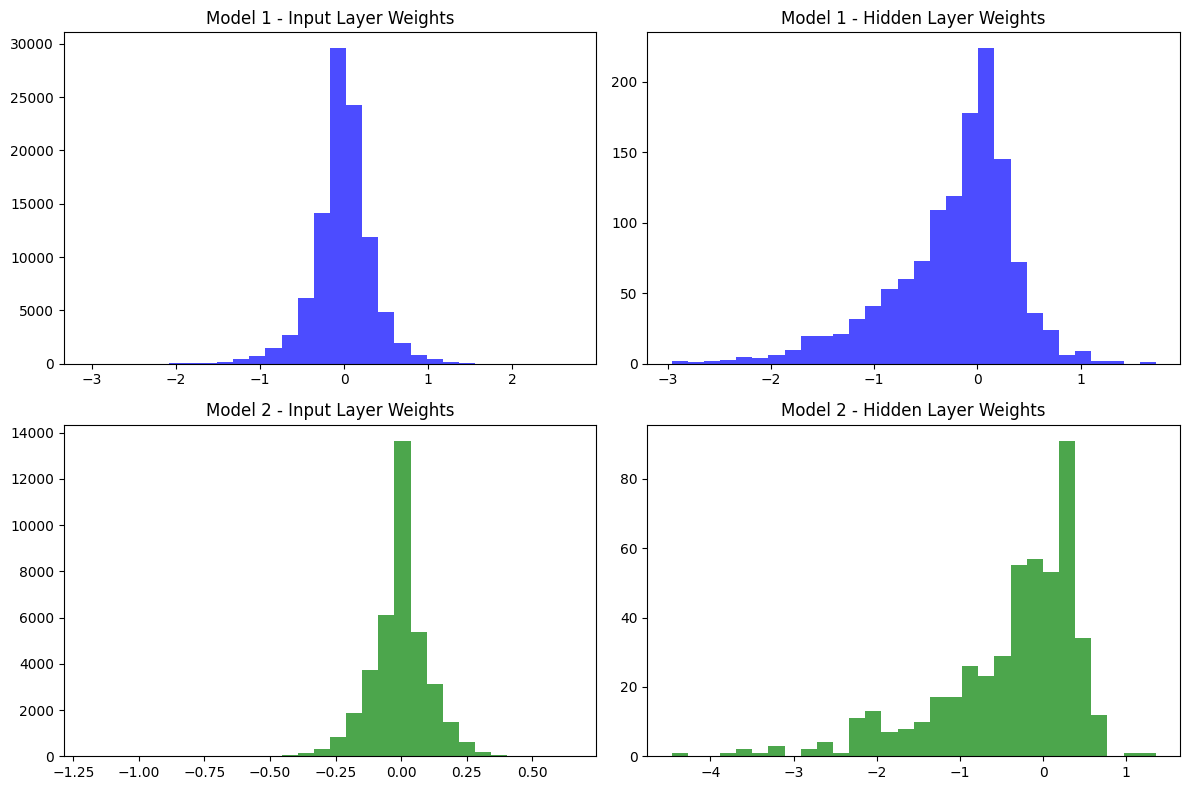

In [11]:
weight_distribution_plot(model1_adam, model2_adam)

In [ ]:
# Model 1 with Adam
final_train_accuracy_model1_adam = history1.history['accuracy'][-1]
final_val_accuracy_model1_adam = history1.history['val_accuracy'][-1]
print(f"Model 1 (Adam) Train Accuracy: {final_train_accuracy_model1_adam:.4f}, Validation Accuracy: {final_val_accuracy_model1_adam:.4f}")

# Model 2 with Adam
final_train_accuracy_model2_adam = history2.history['accuracy'][-1]
final_val_accuracy_model2_adam = history2.history['val_accuracy'][-1]
print(f"Model 2 (Adam) Train Accuracy: {final_train_accuracy_model2_adam:.4f}, Validation Accuracy: {final_val_accuracy_model2_adam:.4f}")

In [12]:
# Define Model 1 with rmsprop optimizer
model1_rmsprop = models.Sequential()
model1_rmsprop.add(layers.Input(shape=(28*28,)))

model1_rmsprop.add(layers.Dense(128, activation='relu'))
model1_rmsprop.add(layers.Dense(10, activation='softmax'))

# Compile Model 1
model1_rmsprop.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train Model 1 for 10 epochs
history1 = model1_rmsprop.fit(x_train_flat, y_train, epochs=40, validation_data=(x_test_flat, y_test))


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7789 - loss: 0.6396 - val_accuracy: 0.8262 - val_loss: 0.4613
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8624 - loss: 0.3820 - val_accuracy: 0.8657 - val_loss: 0.3803
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8737 - loss: 0.3498 - val_accuracy: 0.8639 - val_loss: 0.3992
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8824 - loss: 0.3268 - val_accuracy: 0.8581 - val_loss: 0.4044
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8898 - loss: 0.3109 - val_accuracy: 0.8766 - val_loss: 0.3653
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8943 - loss: 0.3020 - val_accuracy: 0.8696 - val_loss: 0.3655
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8973 - loss: 0.2913 - val_accuracy: 0.8727 - val_loss: 0.3831
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8960 - loss: 0.2938 -

In [13]:
# Define Model 2
model2_rmsprop = models.Sequential()
model2_rmsprop.add(layers.Input(shape=(28*28,)))

model2_rmsprop.add(layers.Dense(48, activation='relu',
                        kernel_regularizer=regularizers.l2(0.0001)))
model2_rmsprop.add(layers.Dropout(0.2))
model2_rmsprop.add(layers.Dense(10, activation='softmax'))

# Compile Model 2
model2_rmsprop.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train Model 2 for 40 epochs
history2 = model2_rmsprop.fit(x_train_flat, y_train, epochs=40, validation_data=(x_test_flat, y_test))


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7291 - loss: 0.7876 - val_accuracy: 0.8305 - val_loss: 0.4886
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8345 - loss: 0.4759 - val_accuracy: 0.8521 - val_loss: 0.4375
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8497 - loss: 0.4382 - val_accuracy: 0.8553 - val_loss: 0.4314
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8614 - loss: 0.4169 - val_accuracy: 0.8495 - val_loss: 0.4441
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8579 - loss: 0.4272 - val_accuracy: 0.8592 - val_loss: 0.4235
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8617 - loss: 0.4201 - val_accuracy: 0.8569 - val_loss: 0.4394
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8632 - loss: 0.4153 - val_accuracy: 0.8631 - val_loss: 0.4279
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8620 - loss: 0.4165 - 

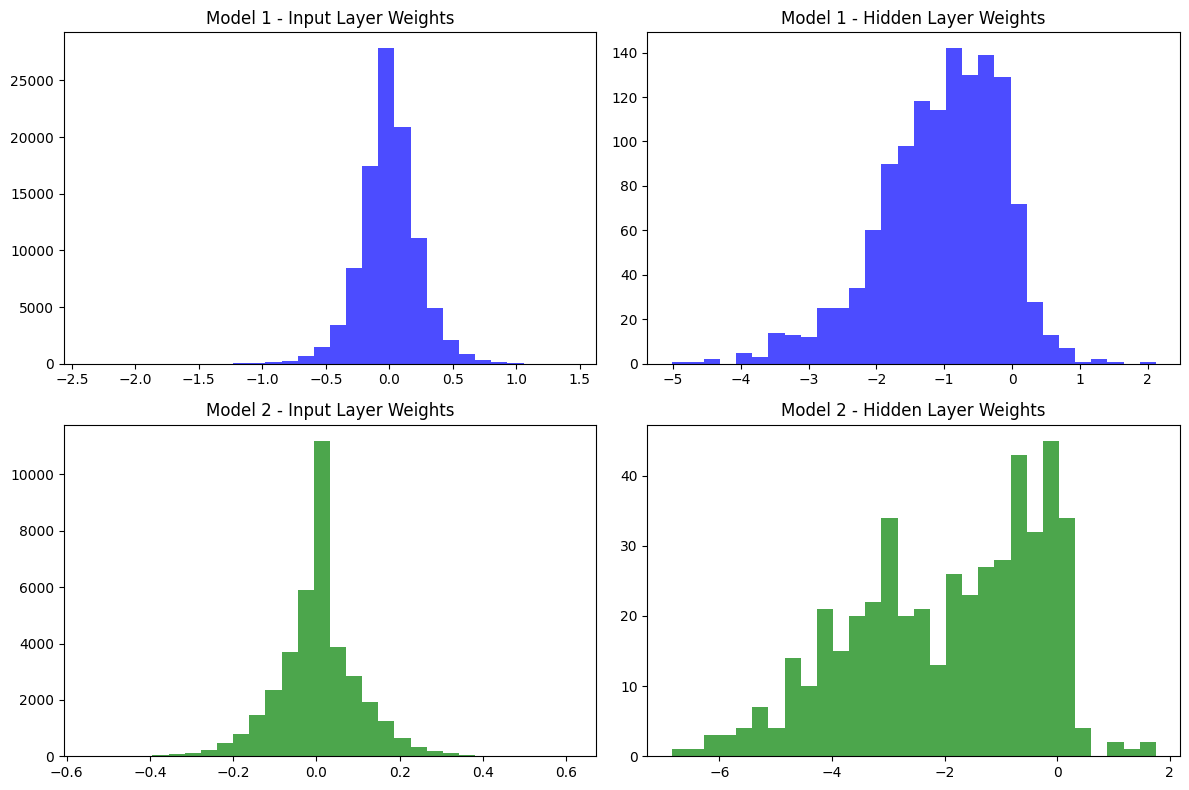

In [19]:
weight_distribution_plot(model1_rmsprop, model2_rmsprop)

In [ ]:
# Model 1 with RMSprop
final_train_accuracy_model1_rmsprop = history1.history['accuracy'][-1]
final_val_accuracy_model1_rmsprop = history1.history['val_accuracy'][-1]
print(f"Model 1 (RMSprop) Train Accuracy: {final_train_accuracy_model1_rmsprop:.4f}, Validation Accuracy: {final_val_accuracy_model1_rmsprop:.4f}")

# Model 2 with RMSprop
final_train_accuracy_model2_rmsprop = history2.history['accuracy'][-1]
final_val_accuracy_model2_rmsprop = history2.history['val_accuracy'][-1]
print(f"Model 2 (RMSprop) Train Accuracy: {final_train_accuracy_model2_rmsprop:.4f}, Validation Accuracy: {final_val_accuracy_model2_rmsprop:.4f}")